In [1]:
import gensim
import gensim.downloader as gdl
glove = gdl.load("glove-wiki-gigaword-100")

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

%matplotlib inline

In [91]:
def generate_tsne_for_voc(model, voc):
    
    arr = np.empty((0,100), dtype='f')
    for w in voc:
        wrd_vector = model[w]
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coord = Y[:, 0]
    y_coord = Y[:, 1]
    # display scatter plot
    size=2
    plt.scatter(x_coord, y_coord, s=2)
    plt.show()
    return Y


def display_tsne_words(Y, voc, input_words, size1=2, size2=10, offset=5):
    x_coord = Y[:, 0]
    y_coord = Y[:, 1]
    # display scatter plot
    size=2
    plt.scatter(x_coord, y_coord, s=size1)
    
    for w in np.arange(len(input_words)):
        index = voc.index(input_words[w])
        plt.scatter(x_coord[index], y_coord[index],s=size2)
        plt.annotate(input_words[w], xy=(x_coord[index],y_coord[index]), \
                     xytext=(w*offset,w*offset), textcoords='offset points')
    plt.show()
    


time: 11 ms


8:07

In [38]:
from collections import Counter
import time
from nltk import word_tokenize

s = time.time()
fdist = Counter()
for rec in open ('text8', 'r'):
    rec = rec.strip()
    fdist.update(word_tokenize(rec))
print(time.time()-s)

53.87542486190796
time: 53.9 s


In [107]:
words = fdist.most_common(5100)[100:]
voc = [word[0] for word in words]
len(voc)

5000

time: 188 ms


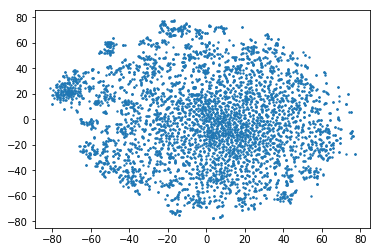

time: 2min 15s


In [108]:
#Z = generate_tsne_for_voc(glove, voc)
filtered_voc = [w for w in voc if w in glove.vocab]
len(filtered_voc)
plt.figure(figsize=(15,15))
Z = generate_tsne_for_voc(glove, filtered_voc)

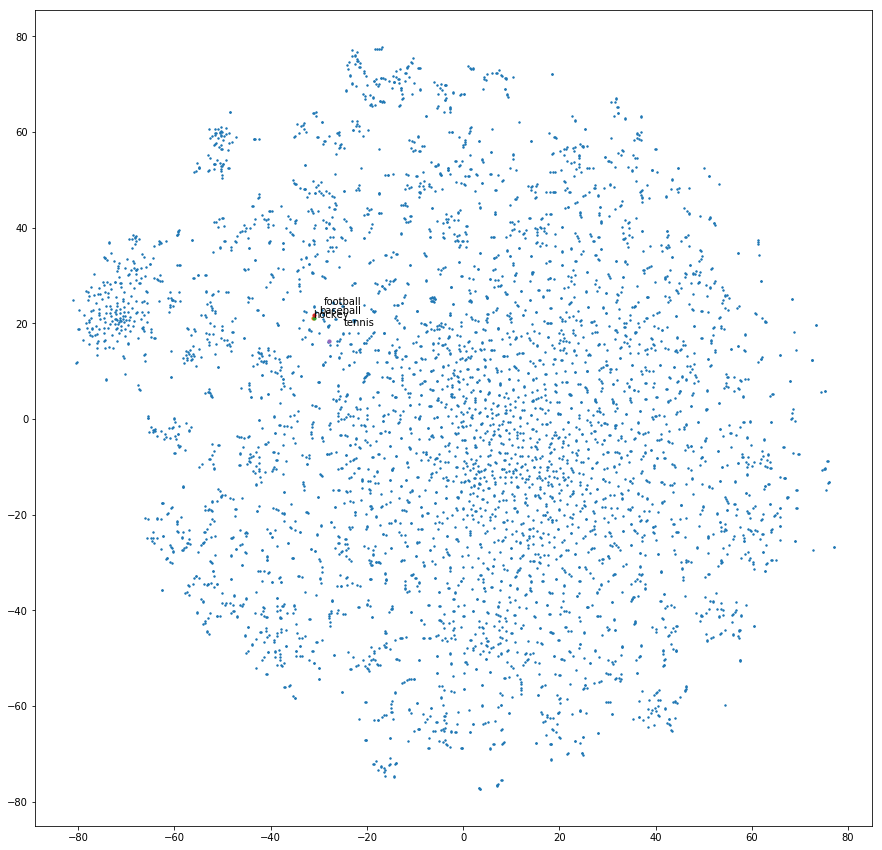

time: 222 ms


In [109]:
%matplotlib inline
plt.figure(figsize=(15,15))
display_tsne_words(Z, filtered_voc, input_words = ['hockey', 'baseball', 'football', 'tennis'])